## Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels.formula.api as smf
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
from sklearn.model_selection import train_test_split

## Import CSV

In [2]:
customers = pd.read_csv('csv/olist_customers_dataset.csv')
geo = pd.read_csv('csv/olist_geolocation_dataset.csv')
items = pd.read_csv('csv/olist_order_items_dataset.csv')
payments = pd.read_csv('csv/olist_order_payments_dataset.csv')
reviews = pd.read_csv('csv/olist_order_reviews_dataset.csv')
orders = pd.read_csv('csv/olist_orders_dataset.csv')
products = pd.read_csv('csv/olist_products_dataset.csv')
sellers = pd.read_csv('csv/olist_sellers_dataset.csv')
category_name_translation = pd.read_csv('csv/product_category_name_translation.csv')

## A Preliminary Look

In [3]:
# With this table alone we can take a look at our demographic info. 
customers.head()
# customers.shape[0] we have 99,441 rows

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
# This will be used to visualize said demographics
geo.head()
# geo.shape[0] we have 1,000,163 rows

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
items.head()
# items.shape[0] we have 112,650 rows

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
payments.head()
# payments.shape[0] we have 103,886 ro111111111111111ws

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
reviews.head() 
# reviews.shape[0] we have 100,000 rows

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
orders.head()
# orders.shape[0] we have 99331 rows

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
products.head()
# products.shape[0] we have 32951 rows

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers.head()
# sellers.shape[0] we have 3095 rows

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [11]:
category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## Exploratory Analysis 

### Demographics 

In [12]:
customers.customer_zip_code_prefix.value_counts().iloc[:10].index

Int64Index([22790, 24220, 22793, 24230, 22775, 29101, 13212, 35162, 22631,
            38400],
           dtype='int64')

In [13]:
# Here we're going to take a look at the top 10 zipcodes and their cities. I think we assume that Sao Paulo and Rio will take all the spots but lets see ! :) 
top_ten_zip = customers['customer_zip_code_prefix'].value_counts().head(10).index
top_ten_zip

Int64Index([22790, 24220, 22793, 24230, 22775, 29101, 13212, 35162, 22631,
            38400],
           dtype='int64')

Text(0, 0.5, 'Count')

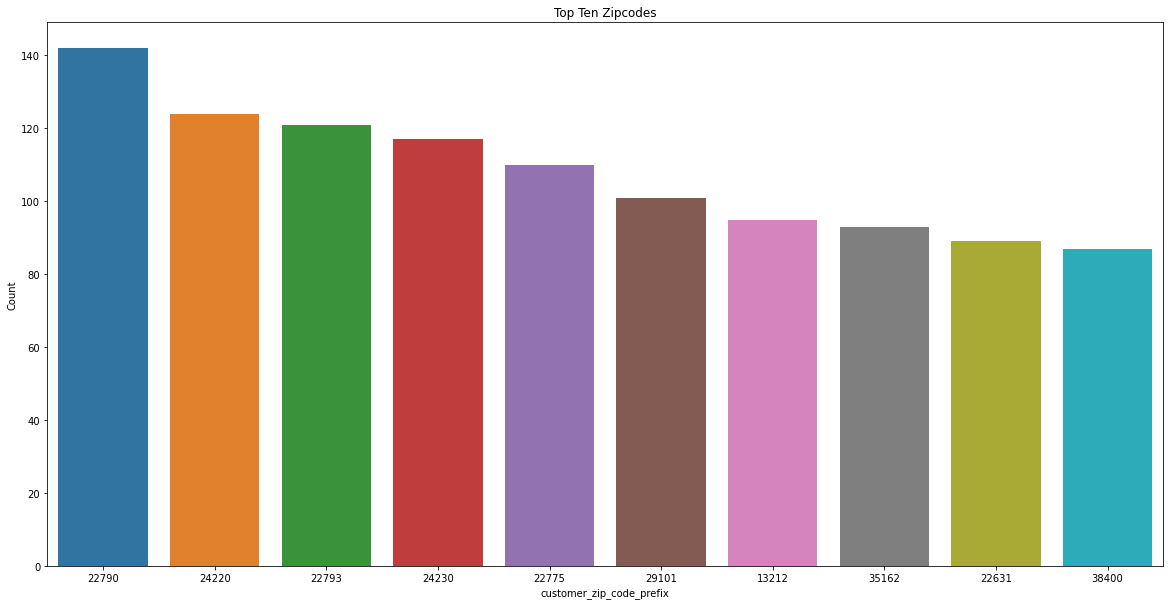

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(x="customer_zip_code_prefix", data=customers,  order=customers['customer_zip_code_prefix'].value_counts().head(10).index)
plt.title("Top Ten Zipcodes")
plt.xlabel("customer_zip_code_prefix")
plt.ylabel("Count")

In [15]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [16]:
orders_test = orders

In [17]:
# Change timestamp columns from str to timestamp
orders_test['order_purchase_timestamp'] = orders_test['order_purchase_timestamp'].astype('datetime64[ns]') 
orders_test['order_approved_at'] = orders_test['order_approved_at'].astype('datetime64[ns]') 
orders_test['order_delivered_carrier_date'] = orders_test['order_delivered_carrier_date'].astype('datetime64[ns]') 
orders_test['order_delivered_customer_date'] = orders_test['order_delivered_customer_date'].astype('datetime64[ns]') 
orders_test['order_estimated_delivery_date'] = orders_test['order_estimated_delivery_date'].astype('datetime64[ns]') 


In [18]:
orders_test['Diff_approved-purchase(min)'] = (orders_test['order_approved_at'] - orders_test['order_purchase_timestamp']).dt.components['minutes']
orders_test['diff_deliv_carrier-approved(hours)'] = (orders_test['order_delivered_carrier_date'] - orders_test['order_approved_at']).dt.components['hours']
orders_test['diff_deliv_customer-carrier(days)'] = (orders_test['order_delivered_customer_date'] - orders_test['order_delivered_carrier_date']).dt.components['days']
orders_test['diff_est_deliv-deliv(days)'] = (orders_test['order_estimated_delivery_date'] - orders_test['order_delivered_customer_date']).dt.components['days']


In [19]:
orders_test['test'] = (orders_test['order_approved_at'] - orders_test['order_purchase_timestamp']).dt

In [20]:
orders_test['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [21]:
orders_test['diff_est_deliv-deliv(days)'].isna().value_counts()

False    96476
True      2965
Name: diff_est_deliv-deliv(days), dtype: int64

In [22]:
orders_test.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Diff_approved-purchase(min),diff_deliv_carrier-approved(hours),diff_deliv_customer-carrier(days),diff_est_deliv-deliv(days),test
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,10.0,8.0,6.0,7.0,<pandas.core.indexes.accessors.TimedeltaProper...
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,42.0,11.0,12.0,5.0,<pandas.core.indexes.accessors.TimedeltaProper...
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,16.0,4.0,9.0,17.0,<pandas.core.indexes.accessors.TimedeltaProper...
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,17.0,17.0,9.0,12.0,<pandas.core.indexes.accessors.TimedeltaProper...
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,21.0,1.0,9.0,<pandas.core.indexes.accessors.TimedeltaProper...


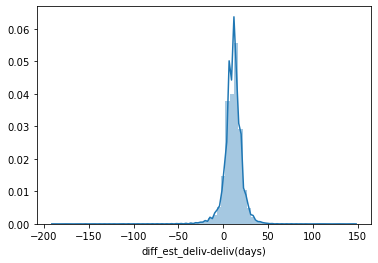

In [23]:
sns.distplot(orders_test['diff_est_deliv-deliv(days)'], bins=70)

## Preparing data for regression

In [24]:
## Drop NA's and test data
orders_test1 = orders_test.dropna()

In [25]:
## Checking NA's 
orders_test1.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                     0
order_delivered_carrier_date          0
order_delivered_customer_date         0
order_estimated_delivery_date         0
Diff_approved-purchase(min)           0
diff_deliv_carrier-approved(hours)    0
diff_deliv_customer-carrier(days)     0
diff_est_deliv-deliv(days)            0
test                                  0
dtype: int64

In [26]:
## merging data
orders_test1 = pd.merge(orders_test1, items, on = 'order_id')

In [27]:
orders_test1 = pd.merge(orders_test1, products, on = 'product_id')

In [28]:
orders_test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110180 entries, 0 to 110179
Data columns (total 27 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   order_id                            110180 non-null  object        
 1   customer_id                         110180 non-null  object        
 2   order_status                        110180 non-null  object        
 3   order_purchase_timestamp            110180 non-null  datetime64[ns]
 4   order_approved_at                   110180 non-null  datetime64[ns]
 5   order_delivered_carrier_date        110180 non-null  datetime64[ns]
 6   order_delivered_customer_date       110180 non-null  datetime64[ns]
 7   order_estimated_delivery_date       110180 non-null  datetime64[ns]
 8   Diff_approved-purchase(min)         110180 non-null  float64       
 9   diff_deliv_carrier-approved(hours)  110180 non-null  float64       
 10  diff_del

In [29]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [30]:
orders_test1.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Diff_approved-purchase(min),diff_deliv_carrier-approved(hours),...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,10.0,8.0,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,35.0,19.0,...,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,18.0,22.0,...,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13,47.0,14.0,...,29.99,14.10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,42.0,11.0,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0


In [31]:
rnd_smpl = orders_test1.sample(1000)

In [32]:
# Building test model
def statsmodels_train_test_split(df, stratify=None, **kwargs):

    if stratify is None:
        y, X = df.iloc[:,0], df.drop(columns=df.columns[0])
        X_train, X_test, y_train, y_test = train_test_split(X,y, **kwargs)
    else:
        y, X = stratify, df.drop(columns = stratify.name)
        X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, **kwargs)
    
    return pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1)

In [38]:
formula = 'freight_value ~ price + product_weight_g + product_length_cm + product_height_cm + product_width_cm'

In [39]:
train, test = statsmodels_train_test_split(rnd_smpl)

In [40]:
linear_model = smf.ols(formula=formula, data=train).fit()

linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          freight_value   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     147.3
Date:                Wed, 16 Sep 2020   Prob (F-statistic):          1.24e-108
Time:                        21:47:13   Log-Likelihood:                -2933.2
No. Observations:                 750   AIC:                             5878.
Df Residuals:                     744   BIC:                             5906.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             9.8262      1.312      7.491      0.000       7.251      12.401
price                 0.0177      0.003      6.510      0.000       0.012       0.023
product_weight_g      0.0021      0.000     11.981      0.000       0.002       0.002
product_length_cm     0.1013      0.034      2.940      0.003       0.034       0.169
product_height_cm     0.2408      0.042      5.758      0.000       0.159       0.323
product_width_cm     -0.1376      0.051     -2.723      0.007      -0.237      -0.038
==============================================================================
Omnibus:                      665.830   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34146.191
Skew:                           3.725   Prob(JB):                         0.00
Kurtosis:                      35.205   Cond. No.                     1.28e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
model = smf.ols(formula = formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          freight_value   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     7.809
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           3.90e-80
Time:                        21:44:58   Log-Likelihood:                -2350.7
No. Observations:                 750   AIC:                             5373.
Df Residuals:                     414   BIC:                             6926.
Df Model:                         335                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         12.5497     13.946      0.900      0.369     -14.864      39.963
C(product_weight_g)[T.50.0]       -7.0205      8.883     -0.790      0.430     -24.483      10.442
C(product_weight_g)[T.75.0]      -10.9625      9.424     -1.163      0.245     -29.488       7.563
C(product_weight_g)[T.83.0]       -4.1622     11.400     -0.365      0.715     -26.572      18.247
C(product_weight_g)[T.100.0]     -10.3284      8.340     -1.238      0.216     -26.723       6.066
C(product_weight_g)[T.105.0]     -17.6651     11.279     -1.566      0.118     -39.837       4.506
C(product_weight_g)[T.117.0]      -5.0135     11.513     -0.435      0.663     -27.644      17.617
C(product_weight_g)[T.125.0]     -10.1182      9.135     -1.108      0.269     -28.076       7.839
C(product_weight_g)[T.145.0]     -14.8239     11.276     -1.315      0.189     -36.990       7.342
C(product_weight_g)[T.150.0]      -9.4288      8.346     -1.130      0.259     -25.835       6.978
C(product_weight_g)[T.153.0]      -7.8761     11.778     -0.669      0.504     -31.029      15.277
C(product_weight_g)[T.157.0]      -8.3497     11.281     -0.740      0.460     -30.524      13.825
C(product_weight_g)[T.161.0]     -15.0546     11.365     -1.325      0.186     -37.395       7.286
C(product_weight_g)[T.165.0]      -7.1864     11.224     -0.640      0.522     -29.250      14.877
C(product_weight_g)[T.167.0]      -1.4177     11.255     -0.126      0.900     -23.543      20.707
C(product_weight_g)[T.169.0]     -21.5344     11.229     -1.918      0.056     -43.607       0.538
C(product_weight_g)[T.173.0]     -10.5661     11.568     -0.913      0.362     -33.306      12.174
C(product_weight_g)[T.175.0]     -12.3580      9.252     -1.336      0.182     -30.545       5.829
C(product_weight_g)[T.180.0]     -12.7599      8.930     -1.429      0.154     -30.314       4.794
C(product_weight_g)[T.183.0]       0.3399     11.501      0.030      0.976     -22.267      22.947
C(product_weight_g)[T.185.0]     -10.3784     11.462     -0.905      0.366     -32.909      12.152
C(product_weight_g)[T.200.0]     -10.1642      8.297     -1.225      0.221     -26.473       6.144
C(product_weight_g)[T.207.0]      -6.5611     11.375     -0.577      0.564     -28.921      15.799
C(product_weight_g)[T.213.0]     -18.9238     11.237     -1.684      0.093     -41.013       3.166
C(product_weight_g)[T.215.0]     -11.6809     11.429     -1.022      0.307     -34.147      10.785
C(product_weight_g)[T.217.0]     -14.1701     11.319     -1.252      0.211     -36.421       8.081
C(product_weight_g)[T.225.0]     -14.8486     11.543     -1.286      0.199     -37.539       7.841
C(product_weight_g)[T.250.0]     -11.7114      8.384     -1.397      0.163     -28.191       4.768
C(product_weig